## **_Random forest is a powerful method for regression and classsification_**
---------------------
<font size=4> **Simplest methods in Random forest methods are called **Tree based methods**   
Random forest method uses several trees when making its predictions, and as in graph theory a collection of trees is called a forest, this is where the random forest method gets its name.  
To make a prediction, the random forest considers the predictions of several trees. It would not be useful to have many identical trees sine all these trees will probably give the same prediction. For this, the trees in the forest are randomized.** </font>   

**Tree based methods can be used for regression and classification. These methods involve dividing the predictor space into simpler regions into straight lines. So we take the entire predictor space and divide it into 2 regions, and then divide these two regions into further smaller regions... so on until we hit a stopping criterion.    
To make a prediction for a previously unseen test observation, we find the region of the predictor space where the test observation falls.  
In regression contexts, we return the mean of the outcomes of the training observations in that particular subset of the predictor space.    
In classification contexts, the mode of the outcomes of the training observations belonging to that subset of predictor space is returned. (The most common element.)**     
When lines are used to divide the predictor space into regions, these lines must be aligned with directions of the axes of the predictor space, because of this constraint we can summarize the splitting rulesin a tree.  
This is also why these methods are known as <font color = "red" font size=4>**DECISION TREE METHODS** </font>  
In higher dimensions, these lines become **planes**, thus we end up dividing the predictor space into high dimensional rectangles/boxes.  
<br>
**Where do one makes these splits/cuts??**     
&emsp; &emsp; &emsp;The basic idea is to carve out the regions in the predictor space that are maximally homogeneous in terms of their outcomes. We will ultimately use the mean/mode of the outcomes in the training data for the selected subset of the predictor space as the prediction for an unknown test datapoint. So we can minimize error by finding maximally homogenous regions in the predictor space. Whenever we make a split, we consider all predictors from $X_1$ to $X_p$ and for each predictor we consider all possible cut points. We select a predictor cut point combination such that the divided predictor spaces have the lowest value for some criterion, usually called a <font color ="blue">**loss function** </font>    
<br>
<br>
In regression this `loss function` is usually the **RSS** Residual sum of squares. In classification two measures are commonly used, called the **Gini index & the cross-entropy**

In [11]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import random

In [50]:
np.show_config()

blas_info:
    libraries = ['cblas', 'blas', 'cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['C:/ProgramData/Miniconda3\\Library\\lib']
    include_dirs = ['C:/ProgramData/Miniconda3\\Library\\include']
    language = f77
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    libraries = ['cblas', 'blas', 'cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['C:/ProgramData/Miniconda3\\Library\\lib']
    include_dirs = ['C:/ProgramData/Miniconda3\\Library\\include']
    language = f77
lapack_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas']
    library_dirs = ['C:/ProgramData/Miniconda3\\Library\\lib']
    language = f77
lapack_opt_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas', 'cblas', 'blas', 'cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['C:/ProgramData/Miniconda3\\Library\\lib']
    language = f77
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    include_dirs

In [14]:
y

30

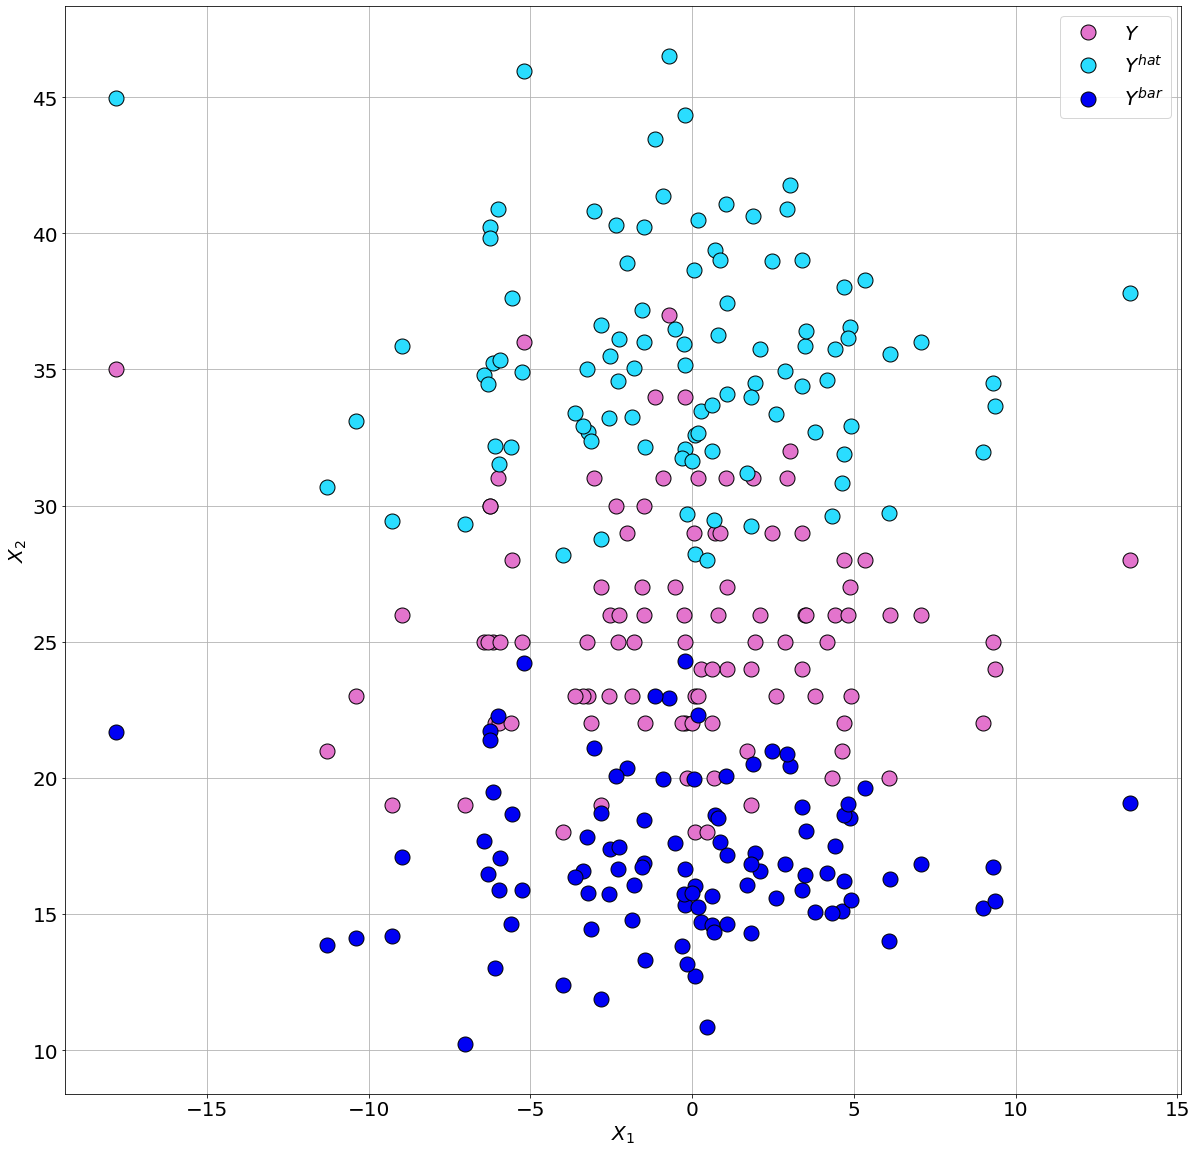

In [38]:
random.seed(111)
x = ss.norm.rvs(size=100)*5
random.seed(9)
y = ss.binom.rvs(p=.256,n=100,size=100)
y_hat = y + 9.456 + ss.uniform.rvs(size=100)
y_bar = y/1.49 + ss.norm.rvs(size=100)
plt.figure(figsize=(20,20))
plt.rcParams["font.size"]=20
plt.grid()
plt.plot(x,y, color = "#E374CD", markersize=15, markeredgecolor="black", marker="o", linestyle="none", label="$Y$")
plt.plot(x,y_hat, color = "#2ADDFF", markersize=15,markeredgecolor="black", marker="o", linestyle="none", label="$Y^{hat}$")
plt.plot(x,y_bar, color = "#0000F4", markersize=15,markeredgecolor="black", marker="o", linestyle="none", label="$Y^{bar}$")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(loc="best")
plt.show()

**See the above synthetic predictor space:   
If $X_2$ is divided along $X_2$ = 17.5, $X_2$ = 32 the resulting three spaces will have almost exclusively a single colour marker (homogeneity).  
Which results in three subdivisions of the original predictor space:**   
**1) 10 < $X_2$ < 17.5  
2) 17.5 < $X_2$ < 32  
3) 32 < $X_2$ < 45**   
These splits can continue until we meet the stopping criterion. 

### _How does a decision tree makes a prediction?_
-------------------------------    
**Take an arbitrary datapoint with coordiantes ($X_1$, $X_2$). If this is a classification problem we first need to find the region where the datapoint falls. And then we find the class to which most of the datapoints in the subdivision belong to, and categorize the test datapoint to that class!.   
In regression settings all the above will apply jus as are but instead of the mode the arithmetic mean will be returned.**

## **_Random forest predictions_**
_____________________________________        
We will now aggregate several trees to form  a forest. The prediction of the random forest combines information from individual prediction trees. In **regression** the prediction of the random forest is the `mean` of the predictions made by individual trees.  
In **classification** the prediction of the random  forest is the `mode` of the random predictios made by individual trees.  
<br>
Random forests intoduce two types of randomness to decision trees. The first type introduces randomness to the data, so that each tree is fit to a somewhat different dataset.   
The second type of randomnes decides which predictors are considered when making the split at any point in a given tree. **These two steps decorrelate the trees which ultimately gives us a more reliable method.**   
The first randomness (randomness in data) is due to bootsrap aggregation, which is often called `bagging`.  **Bootstrap** is a resampling method, which involves repeatedly drawing samples form a training dataset and refitting a model on each sample. If we have `n` observations in our training dataset we form a bootstrap dataset by randomly selecting `n` observations with replacement from the original dataset. Since sampling is done with replacement, the same observation can ocur multiple times in the bootstrap dataset. We can perform yhis multiple times, and we'll likely get somewhat different data every time.   
### **_Bagging in the context of decision trees means that we draw a number of bootstrap datasets and fit each to a tree_**  
<br>

**The second type of randomness is the randomness in how we split the predictor space. Normally with decision trees, we consider each predictor - cut point combination when making a cut in predictor space. In contrst in random forests, each time we consider a split we do not look at all predictors but at a randomly drawn sample of predictors. And we only allow these predictors to make the split. Each time we make a split we take a new sample of predictors.**

**_Say we have a dataset with 1000 observations/records/rows with 9 predictors ranging from $X_1$ to $X_9$. We need to build 50 trees. So lets randomize the data first!   
We first draw 50 bootstrap samples from the original dataset, and dedicate a separate tree for each sub dataset. We then fit the tree one by one. Starting from the first tree and first cut, we first determine which predictors to use. If we are allowed to use 3 predictors when making a cut, we make the best cut can with the data & these 3 predictors and we then move to the second cut in the first tree. Again we find a best cut with the subset data of that particular tree and proceed fitting further on until we meet the stopping criterion we have.** 